In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('covid19_clinical_dataset.csv')

In [3]:
df.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(5644, 111)

In [5]:
df.dtypes

Patient ID                                                object
Patient age quantile                                       int64
SARS-Cov-2 exam result                                    object
Patient addmited to regular ward (1=yes, 0=no)             int64
Patient addmited to semi-intensive unit (1=yes, 0=no)      int64
                                                          ...   
HCO3 (arterial blood gas analysis)                       float64
pO2 (arterial blood gas analysis)                        float64
Arteiral Fio2                                            float64
Phosphor                                                 float64
ctO2 (arterial blood gas analysis)                       float64
Length: 111, dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Columns: 111 entries, Patient ID to ctO2 (arterial blood gas analysis)
dtypes: float64(70), int64(4), object(37)
memory usage: 4.8+ MB


In [7]:
df.describe()

,Patient age quantile,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
count,5644.000000,5644.000000,5644.000000,5644.000000,6.030000e+02,6.030000e+02,6.020000e+02,5.990000e+02,6.020000e+02,6.020000e+02,...,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.000000e+01,2.000000e+01,2.700000e+01
mean,9.318391,0.013997,0.008859,0.007264,-2.187396e-09,-1.598342e-08,-3.820598e-10,7.373957e-09,8.416943e-09,-7.863787e-09,...,-1.851852e-10,8.370370e-09,-1.703704e-09,3.333333e-10,-7.444444e-09,6.000000e-09,-2.481481e-08,4.650000e-09,6.250000e-09,5.185185e-09
std,5.777903,0.117489,0.093713,0.084929,1.000830e+00,1.000830e+00,1.000832e+00,1.000836e+00,1.000832e+00,1.000832e+00,...,1.019049e+00,1.019049e+00,1.019049e+00,1.019049e+00,1.019049e+00,1.019049e+00,1.019049e+00,1.025978e+00,1.025978e+00,1.019049e+00
min,0.000000,0.000000,0.000000,0.000000,-4.501420e+00,-4.345603e+00,-2.552426e+00,-2.457575e+00,-3.970608e+00,-1.865070e+00,...,-1.999560e+00,-1.244817e+00,-3.082674e+00,-3.568877e+00,-2.925618e+00,-2.985592e+00,-1.175907e+00,-1.532932e+00,-1.480526e+00,-2.900254e+00
25%,4.000000,0.000000,0.000000,0.000000,-5.188074e-01,-5.862439e-01,-6.053457e-01,-6.624832e-01,-5.679496e-01,-7.307069e-01,...,-1.122574e+00,-5.348102e-01,-3.308668e-01,-9.210583e-02,-5.117720e-01,-5.397211e-01,-8.169898e-01,-1.214975e-01,-5.527296e-01,-4.852787e-01
50%,9.000000,0.000000,0.000000,0.000000,5.340703e-02,4.031596e-02,-1.217160e-01,-1.015171e-01,1.385207e-02,-1.426696e-02,...,2.677689e-01,-2.120799e-01,-1.181667e-02,2.942021e-01,7.743482e-02,5.633191e-02,-1.599549e-01,-1.174366e-02,-1.381825e-01,1.826928e-01
75%,14.000000,0.000000,0.000000,0.000000,7.171751e-01,7.295320e-01,5.314981e-01,6.838353e-01,6.661759e-01,5.976919e-01,...,7.383496e-01,2.305214e-02,6.661649e-01,5.115003e-01,4.385609e-01,5.085100e-01,4.500090e-01,-1.174366e-02,2.763648e-01,5.937525e-01
max,19.000000,1.000000,1.000000,1.000000,2.662704e+00,2.671868e+00,9.532034e+00,3.713052e+00,3.645706e+00,3.764100e+00,...,1.337265e+00,3.236524e+00,1.703078e+00,1.042674e+00,1.940087e+00,2.029471e+00,2.205371e+00,2.841856e+00,2.862350e+00,1.826932e+00


In [8]:
df.isnull().sum()

Patient ID                                                  0
Patient age quantile                                        0
SARS-Cov-2 exam result                                      0
Patient addmited to regular ward (1=yes, 0=no)              0
Patient addmited to semi-intensive unit (1=yes, 0=no)       0
                                                         ... 
HCO3 (arterial blood gas analysis)                       5617
pO2 (arterial blood gas analysis)                        5617
Arteiral Fio2                                            5624
Phosphor                                                 5624
ctO2 (arterial blood gas analysis)                       5617
Length: 111, dtype: int64

In [9]:
df.isna().any()

Patient ID                                               False
Patient age quantile                                     False
SARS-Cov-2 exam result                                   False
Patient addmited to regular ward (1=yes, 0=no)           False
Patient addmited to semi-intensive unit (1=yes, 0=no)    False
                                                         ...  
HCO3 (arterial blood gas analysis)                        True
pO2 (arterial blood gas analysis)                         True
Arteiral Fio2                                             True
Phosphor                                                  True
ctO2 (arterial blood gas analysis)                        True
Length: 111, dtype: bool

In [10]:
df.dropna(how='all',axis=1,inplace=True)

In [11]:
df.drop('Patient ID',axis=1,inplace=True)

In [12]:
df.shape

(5644, 105)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Columns: 105 entries, Patient age quantile to ctO2 (arterial blood gas analysis)
dtypes: float64(65), int64(4), object(36)
memory usage: 4.5+ MB


In [14]:
df.dtypes[df.dtypes=='object']


SARS-Cov-2 exam result         object
Respiratory Syncytial Virus    object
Influenza A                    object
Influenza B                    object
Parainfluenza 1                object
CoronavirusNL63                object
Rhinovirus/Enterovirus         object
Coronavirus HKU1               object
Parainfluenza 3                object
Chlamydophila pneumoniae       object
Adenovirus                     object
Parainfluenza 4                object
Coronavirus229E                object
CoronavirusOC43                object
Inf A H1N1 2009                object
Bordetella pertussis           object
Metapneumovirus                object
Parainfluenza 2                object
Influenza B, rapid test        object
Influenza A, rapid test        object
Strepto A                      object
Urine - Esterase               object
Urine - Aspect                 object
Urine - pH                     object
Urine - Hemoglobin             object
Urine - Bile pigments          object
Urine - Keto

In [15]:
objList = df.select_dtypes(include = "object").columns
print (objList)
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    df[feat] = le.fit_transform(df[feat].astype(str))


Index(['SARS-Cov-2 exam result', 'Respiratory Syncytial Virus', 'Influenza A',
       'Influenza B', 'Parainfluenza 1', 'CoronavirusNL63',
       'Rhinovirus/Enterovirus', 'Coronavirus HKU1', 'Parainfluenza 3',
       'Chlamydophila pneumoniae', 'Adenovirus', 'Parainfluenza 4',
       'Coronavirus229E', 'CoronavirusOC43', 'Inf A H1N1 2009',
       'Bordetella pertussis', 'Metapneumovirus', 'Parainfluenza 2',
       'Influenza B, rapid test', 'Influenza A, rapid test', 'Strepto A',
       'Urine - Esterase', 'Urine - Aspect', 'Urine - pH',
       'Urine - Hemoglobin', 'Urine - Bile pigments', 'Urine - Ketone Bodies',
       'Urine - Nitrite', 'Urine - Urobilinogen', 'Urine - Protein',
       'Urine - Leukocytes', 'Urine - Crystals', 'Urine - Hyaline cylinders',
       'Urine - Granular cylinders', 'Urine - Yeasts', 'Urine - Color'],
      dtype='object')


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Columns: 105 entries, Patient age quantile to ctO2 (arterial blood gas analysis)
dtypes: float64(65), int32(36), int64(4)
memory usage: 3.7 MB


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Columns: 105 entries, Patient age quantile to ctO2 (arterial blood gas analysis)
dtypes: float64(65), int32(36), int64(4)
memory usage: 3.7 MB


In [18]:
df.replace(np.nan,0, inplace=True)

In [19]:
df.isna().any()

Patient age quantile                                     False
SARS-Cov-2 exam result                                   False
Patient addmited to regular ward (1=yes, 0=no)           False
Patient addmited to semi-intensive unit (1=yes, 0=no)    False
Patient addmited to intensive care unit (1=yes, 0=no)    False
                                                         ...  
HCO3 (arterial blood gas analysis)                       False
pO2 (arterial blood gas analysis)                        False
Arteiral Fio2                                            False
Phosphor                                                 False
ctO2 (arterial blood gas analysis)                       False
Length: 105, dtype: bool

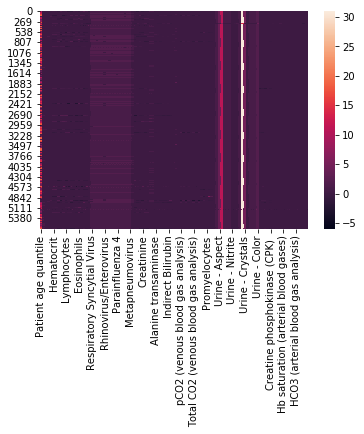

In [20]:
sns.heatmap(df)

In [21]:
dfcor=df.corr()
dfcor

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
Patient age quantile,1.000000,0.075244,4.616576e-02,0.015736,-0.035772,0.031292,0.019498,-0.051183,0.038392,-0.012099,...,-0.016286,-0.034110,0.041484,0.041507,0.006264,0.012090,-0.007157,-0.021239,-4.135060e-02,-0.004455
SARS-Cov-2 exam result,0.075244,1.000000,1.424375e-01,0.019364,0.027586,0.037396,0.039530,-0.106482,0.040622,0.045766,...,0.015189,-0.037511,0.015111,0.036451,-0.028879,-0.024761,0.036186,-0.030815,-5.314858e-03,0.030967
"Patient addmited to regular ward (1=yes, 0=no)",0.046166,0.142437,1.000000e+00,-0.011264,-0.010192,-0.071569,-0.075363,-0.150186,-0.010687,-0.043593,...,0.051133,-0.058510,0.008632,0.052540,-0.041230,-0.034427,0.027247,-0.040326,-4.432840e-11,0.070462
"Patient addmited to semi-intensive unit (1=yes, 0=no)",0.015736,0.019364,-1.126431e-02,1.000000,-0.008087,-0.161800,-0.157295,0.006185,-0.020840,-0.122487,...,-0.199293,0.040333,-0.080640,-0.063793,-0.040144,-0.048656,-0.120723,-0.025106,5.392442e-02,-0.017481
"Patient addmited to intensive care unit (1=yes, 0=no)",-0.035772,0.027586,-1.019207e-02,-0.008087,1.000000,-0.151409,-0.147314,0.103724,-0.060529,-0.099364,...,0.111363,0.094293,0.064385,-0.056863,0.134375,0.130018,0.049237,0.105651,3.943719e-02,-0.121242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HCO3 (arterial blood gas analysis),0.012090,-0.024761,-3.442683e-02,-0.048656,0.130018,-0.067014,-0.087151,0.025061,0.055542,-0.051618,...,-0.348558,0.513884,0.644222,-0.209320,0.992877,1.000000,-0.302613,0.082657,-1.375525e-01,-0.434762
pO2 (arterial blood gas analysis),-0.007157,0.036186,2.724735e-02,-0.120723,0.049237,0.024449,0.016877,-0.025850,-0.047159,0.038621,...,0.796438,-0.296518,-0.093285,0.200313,-0.314796,-0.302613,1.000000,-0.181270,-1.016304e-01,0.270951
Arteiral Fio2,-0.021239,-0.030815,-4.032552e-02,-0.025106,0.105651,0.012284,-0.000655,0.081845,0.013618,-0.045810,...,-0.017055,0.381415,-0.227696,-0.376063,0.134155,0.082657,-0.181270,1.000000,1.259335e-01,-0.196606
Phosphor,-0.041351,-0.005315,-4.432840e-11,0.053924,0.039437,0.036852,0.057834,0.049969,-0.041703,0.035438,...,-0.193765,0.365646,-0.488217,-0.459113,-0.076610,-0.137552,-0.101630,0.125933,1.000000e+00,0.219942


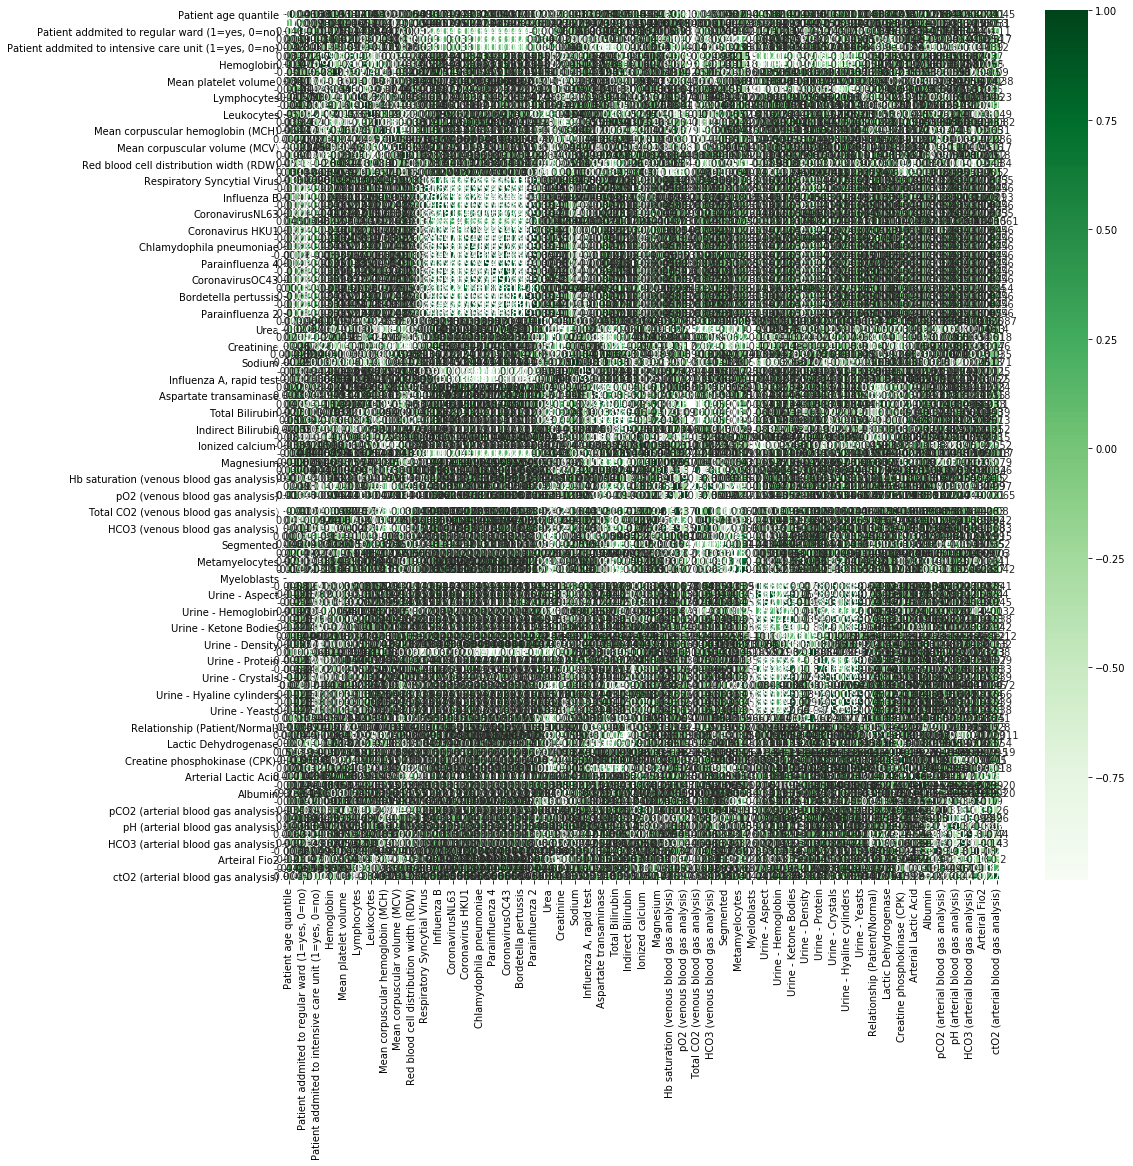

In [22]:
plt.figure(figsize = (16,16))
sns.heatmap(dfcor, cmap='Greens',annot=True,linewidths=0.5)

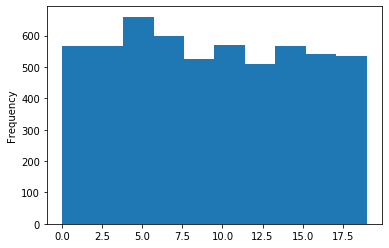

In [23]:
df['Patient age quantile'].plot.hist()#even distribution of attribute

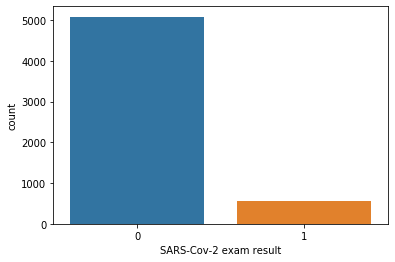

In [24]:
sns.countplot(df['SARS-Cov-2 exam result'])# very minimal positive cases of SARS-Cov-2

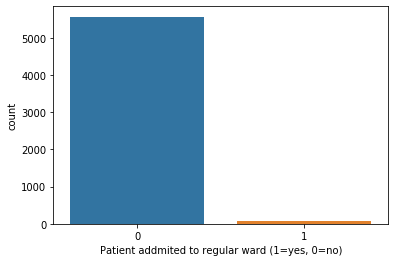

In [25]:
sns.countplot(df['Patient addmited to regular ward (1=yes, 0=no)'])#99% percent of patients with regular cases are admitted to regular ward

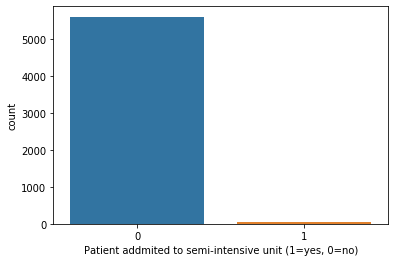

In [26]:
sns.countplot(df['Patient addmited to semi-intensive unit (1=yes, 0=no)'])#99% percent of patients with semi intensive cases are admitted to semi intensive ward

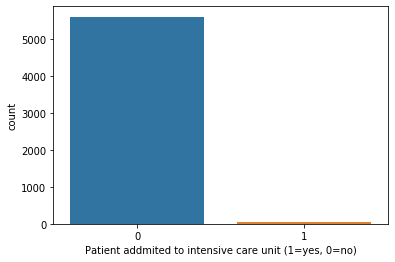

In [27]:
sns.countplot(df['Patient addmited to intensive care unit (1=yes, 0=no)'])#99% percent of patients with intensive cases are admitted to intensive care unit

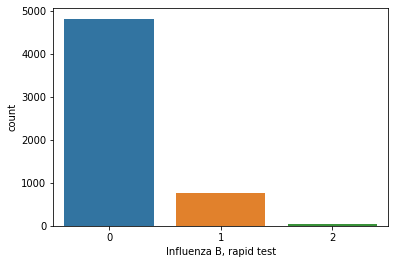

In [28]:
sns.countplot(df['Influenza B, rapid test'])#minimal cases of positive influenza B

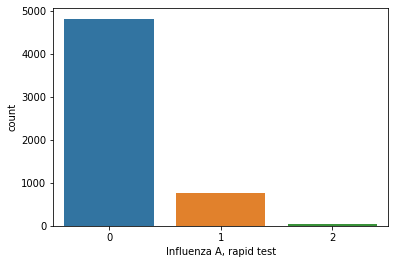

In [29]:
sns.countplot(df['Influenza A, rapid test'])#minimal cases of positive influenza A

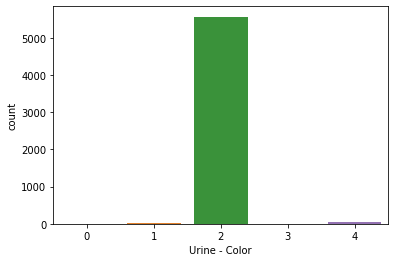

In [30]:
sns.countplot(df['Urine - Color'])#99% of Urine color is normal

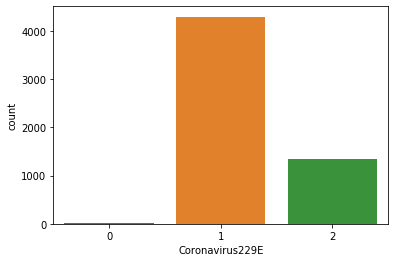

In [31]:
sns.countplot(df['Coronavirus229E'])#more of a particular type

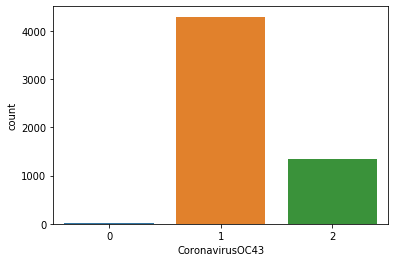

In [32]:
sns.countplot(df['CoronavirusOC43'])#more of a particular type

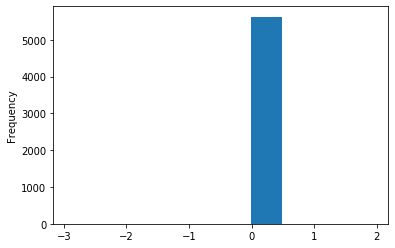

In [33]:
df['Total CO2 (arterial blood gas analysis)'].plot.hist()

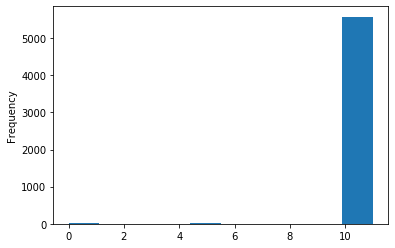

In [34]:
df['Urine - pH'].plot.hist()#pH for most cases is 10, every minimal cases are outside the normal

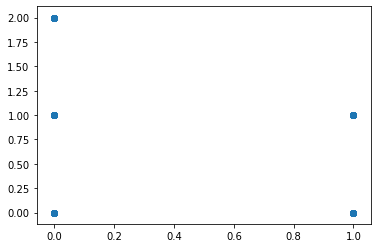

In [35]:
plt.scatter(df['SARS-Cov-2 exam result'],df['Influenza A, rapid test'])#undefined relationship

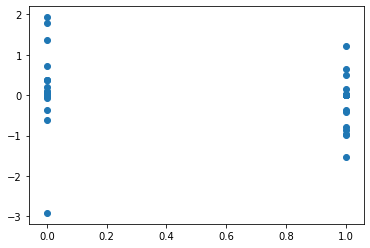

In [36]:
plt.scatter(df['SARS-Cov-2 exam result'],df['Total CO2 (arterial blood gas analysis)'])#undefined relationship

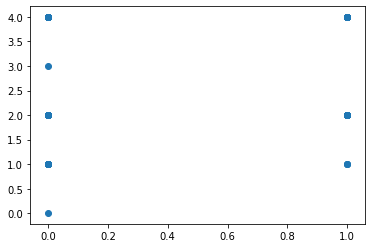

In [37]:
plt.scatter(df['SARS-Cov-2 exam result'],df['Urine - Color'])#undefined relationship

In [38]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df)
x=pd.DataFrame(x,columns=df.columns)

In [39]:
mean_vec=np.mean(x,axis=0)
cov_mat=(x-mean_vec).T.dot((x-mean_vec))/(x.shape[0]-1)

In [40]:
cov_mat=np.cov(x.T)
eig_vals,eig_vecs=np.linalg.eig(cov_mat)

In [41]:
eig_pairs=[(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
15.170398221243264
11.539646639345976
4.843680667473384
4.558194028820811
3.9896873441143006
3.294395720024927
3.1677351479566696
2.650099118121173
2.583506258875958
2.4458055802608913
2.1987665798693468
2.1038919269755447
2.0664993315630933
1.9015637077563459
1.7962921067334134
1.744079099255284
1.543322792560011
1.6067952070381988
1.4291835741165522
1.3530758655358812
1.234756105481199
1.228123709706411
1.1685329578199297
1.1547576543804055
1.1042487720832457
1.0722548086028416
1.0431157267171782
1.0037813071557733
0.9938820462935174
0.9729173701377047
0.9384376350001283
0.9415528870071213
0.914447705294885
0.8662210323071978
0.8051240477963411
0.841174879414713
0.8301814074982872
0.7798864546730401
0.7476106907542059
0.7203023395435956
0.7705779382822844
0.6745704549491117
0.6577943285273763
0.6333211587936893
0.5914061960964434
0.6149804040268222
0.5469943787582907
0.5205396057028306
0.49357740202278333
0.4230353575552816
0.4366602614165365
0.387855

In [42]:
y = x['SARS-Cov-2 exam result']
x.drop('SARS-Cov-2 exam result',inplace=True,axis=1)

In [43]:
from sklearn.decomposition import PCA
pca=PCA(n_components=35, whiten='True')
x=pca.fit_transform(x)

In [44]:
x.shape

(5644, 35)

In [45]:
y.shape

(5644,)

In [46]:
y=y.values.reshape(-1,1)

In [47]:
thresh = np.mean(np.unique(y))
super_threshold = y > thresh
super_threshold_2 = y<= thresh
y[super_threshold] = 1.0
y[super_threshold_2] = 0.0

In [55]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [56]:
x_train.shape,x_test.shape

((4515, 35), (1129, 35))

In [57]:
y_train.shape,y_test.shape

((4515, 1), (1129, 1))

In [58]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc

In [59]:
KNN=KNeighborsClassifier(n_neighbors=6)
SV=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=6)
GNB=GaussianNB()

In [60]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SV))
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier', DT))
models.append(('GaussianNB', GNB))

*********************** KNeighborsClassifier ***********************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')


Accuracy_score=  0.9034543844109831


Cross_Val_Score=  0.9018436578171091


roc_auc_score=  0.5160699386948162


classification_report
               precision    recall  f1-score   support

         0.0       0.91      1.00      0.95      1021
         1.0       0.44      0.04      0.07       108

    accuracy                           0.90      1129
   macro avg       0.68      0.52      0.51      1129
weighted avg       0.86      0.90      0.86      1129


[[1016    5]
 [ 104    4]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



*********************** SVC ***********************


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf

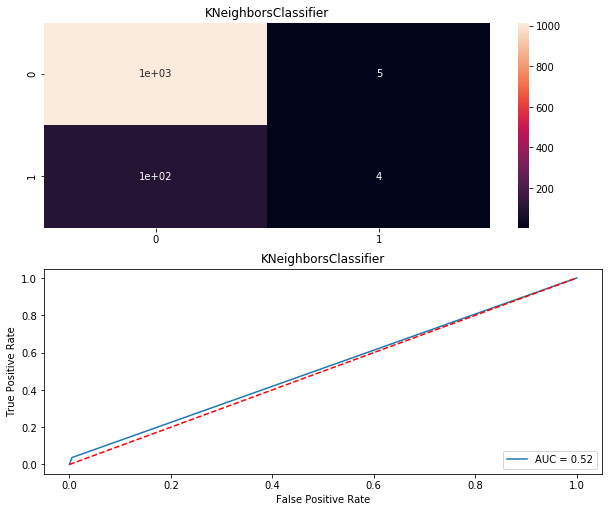

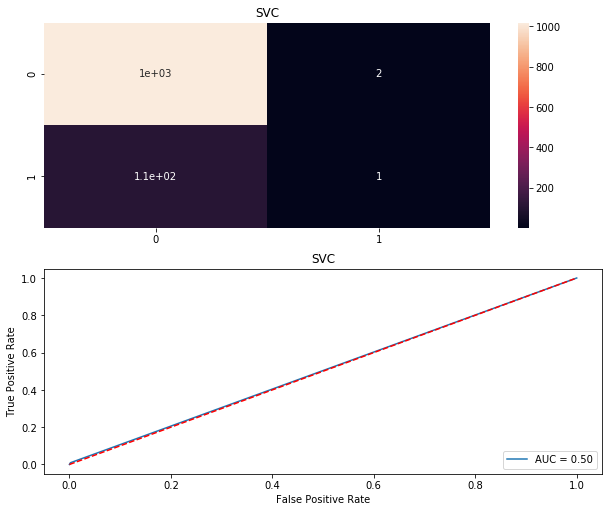

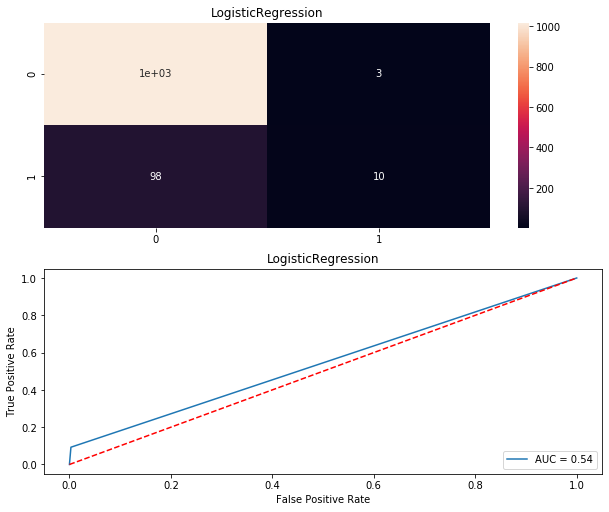

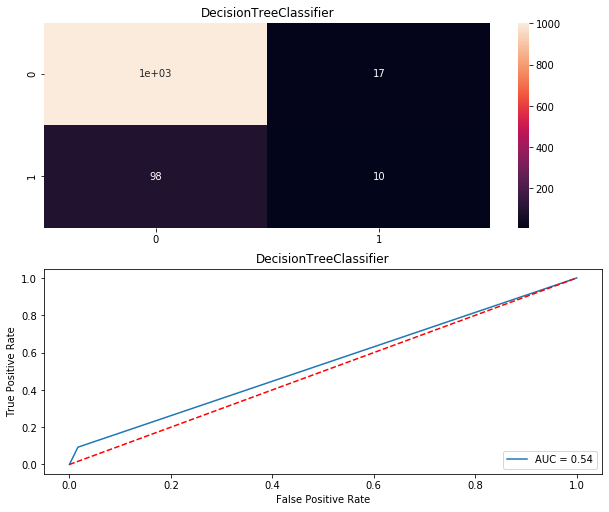

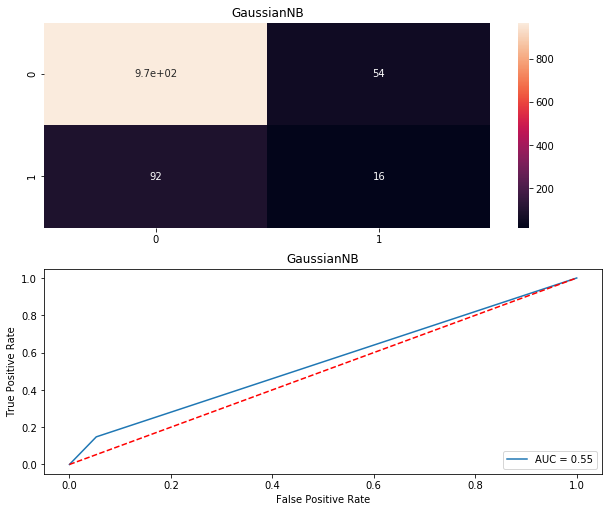

In [61]:
Model = []
score = []
cvs = []
rocscore =[]
for name,model in models:
    print('***********************',name,'***********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score= ',AS)
    score.append(AS*100)
    print('\n')
    sc = cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score= ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print('roc_auc_score= ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre), end = "\n\n")
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [62]:
result=pd.DataFrame({'Model':Model, 'Accuracy_score': score,'Cross_val_score':cvs, 'Roc_auc_curve':rocscore})
result

,Model,Accuracy_score,Cross_val_score,Roc_auc_curve
0,KNeighborsClassifier,90.345438,90.184366,51.606994
1,SVC,90.345438,90.219670,50.365020
2,LogisticRegression,91.054030,90.308479,54.482715
3,DecisionTreeClassifier,89.813995,88.731532,53.797112
4,GaussianNB,87.068202,85.046727,54.762941


In [63]:
from sklearn.externals import joblib

In [64]:
joblib.dump(LR,'covidclinical_file.obj')

['covidclinical_file.obj']